In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import nsepy as nse
from nsepy import get_history
import mplfinance as mpf

In [3]:
nifty=pd.read_csv('NIFTY200.csv')

In [4]:
symbol=nifty[['SYMBOL']]
nifty.columns


Index(['SYMBOL'], dtype='object')

In [5]:
nifty.shape

(200, 1)

In [6]:
nifty.info

<bound method DataFrame.info of          SYMBOL
0           ACC
1        AUBANK
2      AARTIIND
3    ABBOTINDIA
4      ADANIENT
..          ...
195      VOLTAS
196   WHIRLPOOL
197       WIPRO
198     YESBANK
199        ZEEL

[200 rows x 1 columns]>

In [ ]:
list=[]
updated=datetime(datetime.now().year,datetime.now().month,datetime.now().day)
for name, values in nifty.iteritems():
    for index in values:
        if update!=datetime(datetime.now().year,datetime.now().month,datetime.now().day):
            rising_stock=get_history(index,start=datetime(datetime.now().year,datetime.now().month,datetime.now().day),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
            sublist=[]
            if rising_stock.shape[0]>1 and rising_stock['Open'][-1] < rising_stock['Close'][-1]:
                short_window = 44
                rising_stock["44_obs_for_SMA"] = rising_stock["Close"].rolling(window=short_window).mean()

                if (rising_stock["High"][-1]>= rising_stock["44_obs_for_SMA"][-1] and rising_stock["Low"][-1]<= rising_stock["44_obs_for_SMA"][-1]) or abs(rising_stock["Low"][-1]-rising_stock["44_obs_for_SMA"][-1])<=3 :
                    sublist.append(index)
                    sublist.append(rising_stock["Open"][-1])
                    sublist.append(rising_stock["High"][-1])
                    sublist.append(rising_stock["Low"][-1])
                    sublist.append(rising_stock["Close"][-1])
                    sublist.append(rising_stock["44_obs_for_SMA"][-1])

                    list.append(sublist)
                    rising_stock.index.name = 'Date'

                    rising_stock.to_csv("stocks/{index}.csv".format(index=index))
                    print(index)

In [7]:
# Get historical data of all Nifty50 stocks and filter out rising stocks
# calculating the simple moving average (which is just mean calculated progressively) 
# and add the result as a new column to dataframe
list=[]
for name, values in nifty.iteritems():
    for index in values:
        rising_stock=get_history(index,start=datetime(2021,1,1),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
        sublist=[]
        if rising_stock.shape[0]>1 and rising_stock['Open'][-1] < rising_stock['Close'][-1]:
            short_window = 44
            rising_stock["44_obs_for_SMA"] = rising_stock["Close"].rolling(window=short_window).mean()
            
            if (rising_stock["High"][-1]>= rising_stock["44_obs_for_SMA"][-1] and rising_stock["Low"][-1]<= rising_stock["44_obs_for_SMA"][-1]) or abs(rising_stock["Low"][-1]-rising_stock["44_obs_for_SMA"][-1])<=3 :
                sublist.append(index)
                sublist.append(rising_stock["Open"][-1])
                sublist.append(rising_stock["High"][-1])
                sublist.append(rising_stock["Low"][-1])
                sublist.append(rising_stock["Close"][-1])
                sublist.append(rising_stock["44_obs_for_SMA"][-1])

                list.append(sublist)
                rising_stock.index.name = 'Date'

                rising_stock.to_csv("stocks/{index}.csv".format(index=index))
                print(index)
            
    #print('{name}: {value}'.format(name=name, value=values))


ABFRL
APOLLOHOSP
DABUR
LALPATHLAB
GUJGASLTD
HAVELLS
IGL
IPCALAB
NTPC
TCS
TATACONSUM
TATAPOWER
YESBANK


In [9]:
data=pd.DataFrame(list,columns=["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"])
data=data[["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"]]
data.to_csv("stocks/rising_stocks.csv")

In [10]:
rising_stocks=pd.read_csv('stocks/rising_stocks.csv',index_col=0)

In [11]:
rising_stocks.columns

Index(['SYMBOL', 'Open', 'High', 'Low', 'Close', '44_obs_for_SMA'], dtype='object')

In [12]:
rising_stocks

,SYMBOL,Open,High,Low,Close,44_obs_for_SMA
0,APOLLOHOSP,3145.00,3186.30,3125.00,3168.75,3134.515909
1,DABUR,532.30,544.30,529.55,540.45,542.292045
2,LALPATHLAB,2821.80,2973.35,2815.10,2956.15,2850.889773
3,GUJGASLTD,512.90,539.70,508.85,536.30,530.757955
4,HAVELLS,1013.00,1033.95,1011.00,1030.80,1023.144318
5,IGL,515.00,534.00,510.00,528.85,512.489773
6,IPCALAB,2049.00,2089.00,2022.00,2070.60,2084.919318
7,TCS,3150.00,3170.35,3128.60,3159.15,3136.993182
8,TATACONSUM,659.95,665.00,650.20,663.85,654.082955


In [13]:
### and plot the graph with points where upturn happen

for index, row in rising_stocks.iterrows():
    if row["High"]>= row["44_obs_for_SMA"] and row["44_obs_for_SMA"] >=row["Low"] :
        #print(row["SYMBOL"])
        print("{symbol}    {high}       {low}         {sma} ".format(symbol=row["SYMBOL"],high=round(row["High"]),low=round(row["Low"]),sma=round(row["44_obs_for_SMA"])))

APOLLOHOSP    3186       3125         3135 
DABUR    544       530         542 
LALPATHLAB    2973       2815         2851 
GUJGASLTD    540       509         531 
HAVELLS    1034       1011         1023 
IGL    534       510         512 
IPCALAB    2089       2022         2085 
TCS    3170       3129         3137 
TATACONSUM    665       650         654 


In [14]:
#rising_stock.dtypes

In [15]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

APOLLOHOSP


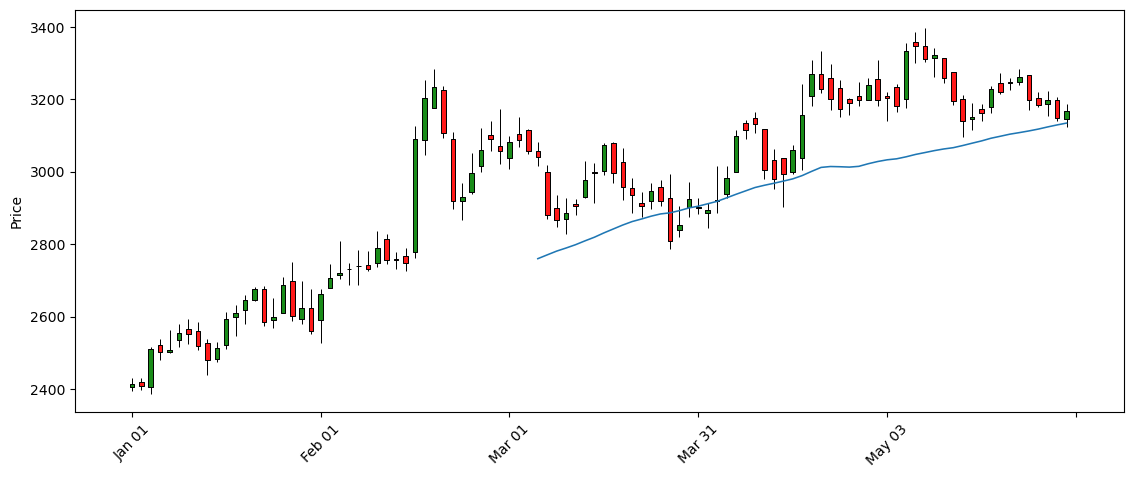

DABUR


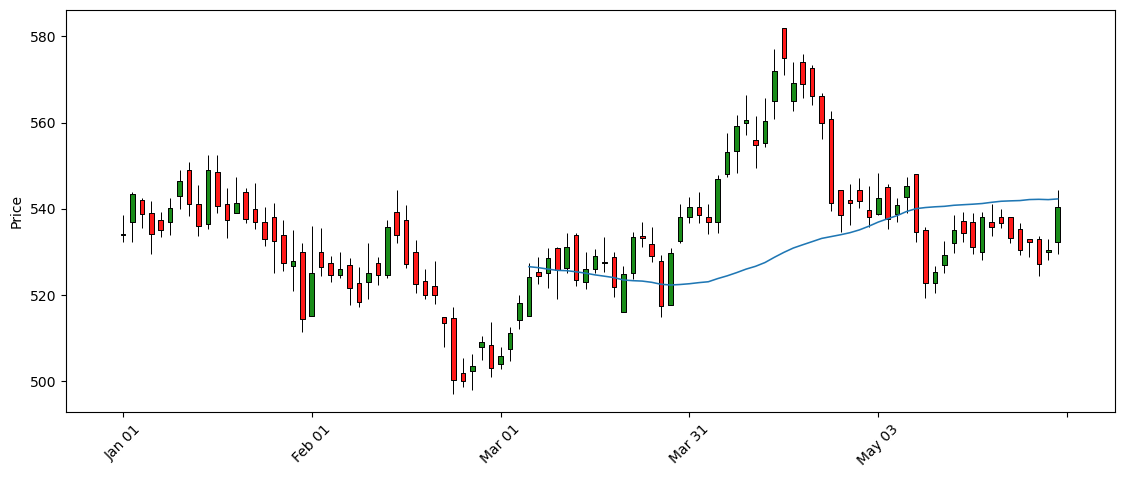

LALPATHLAB


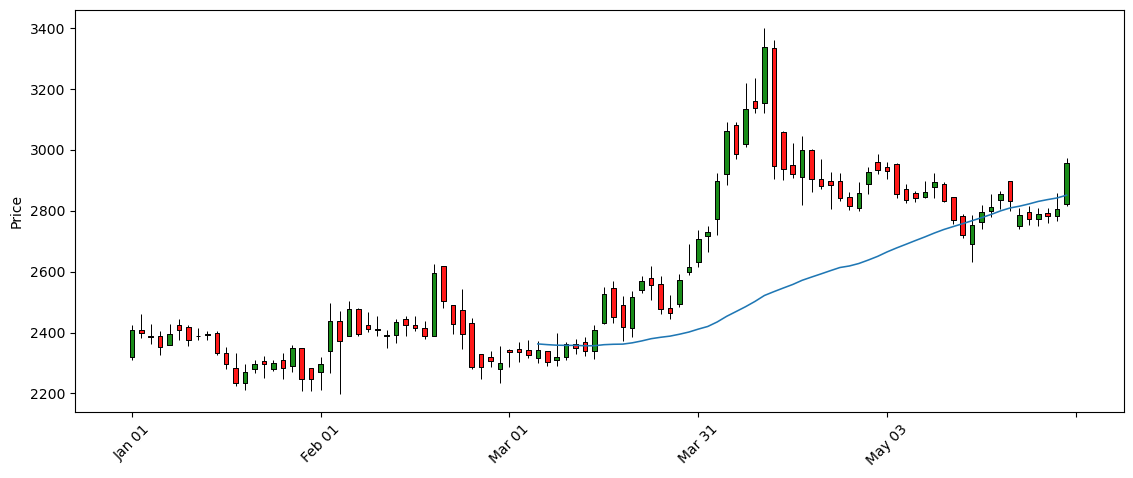

GUJGASLTD


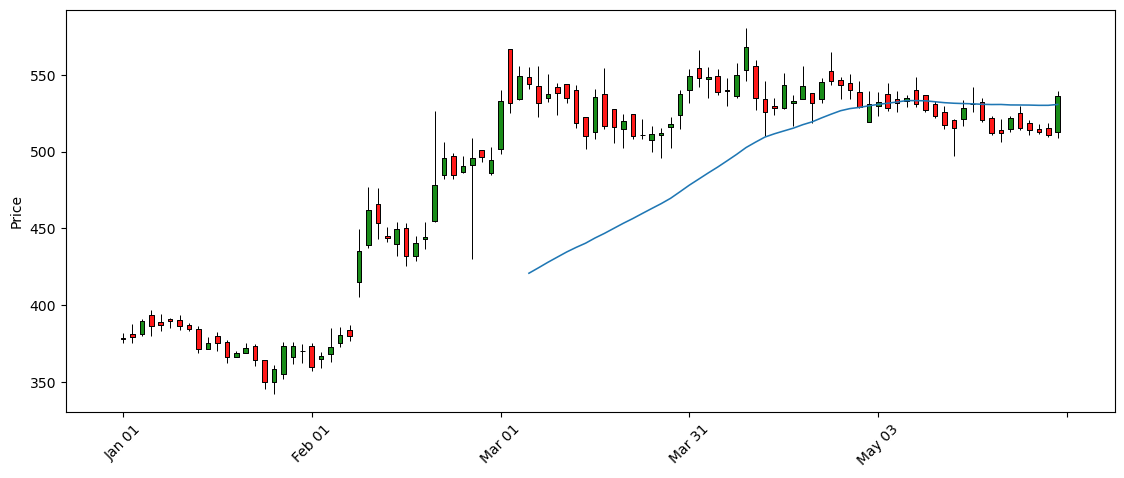

HAVELLS


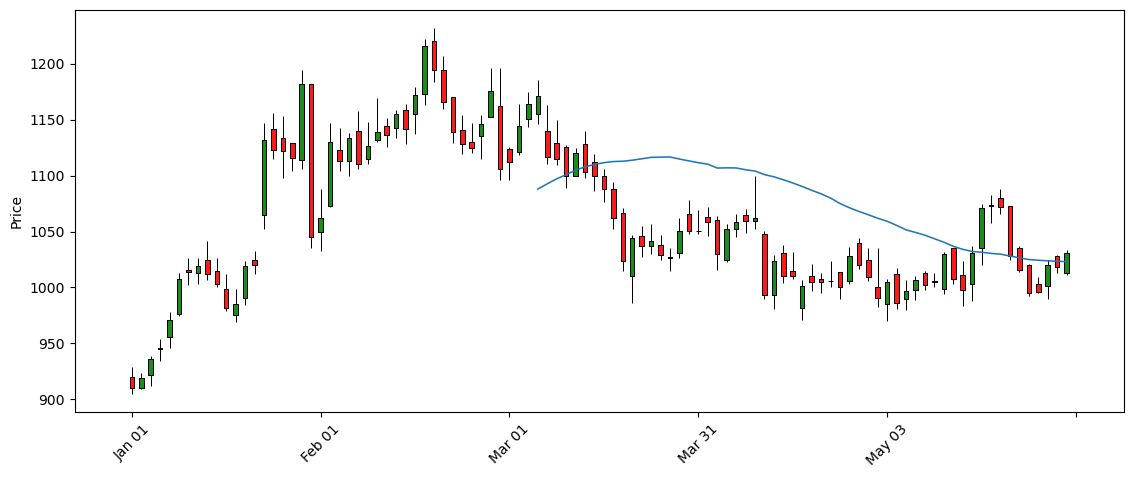

IGL


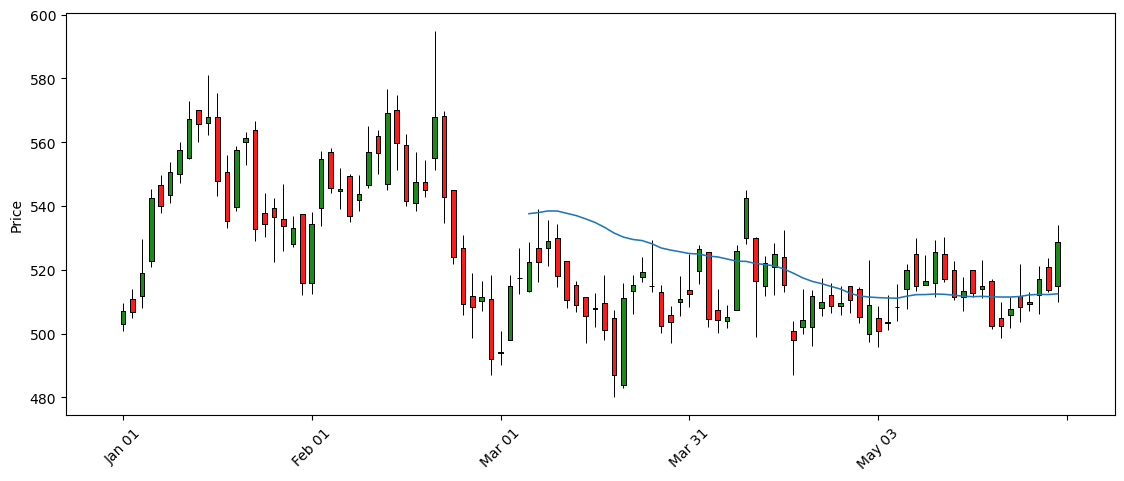

IPCALAB


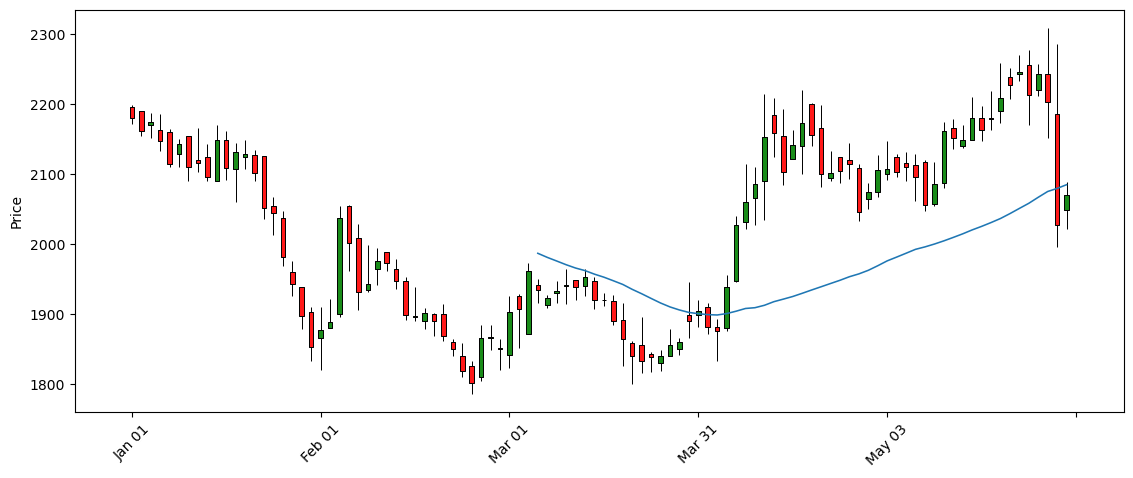

TCS


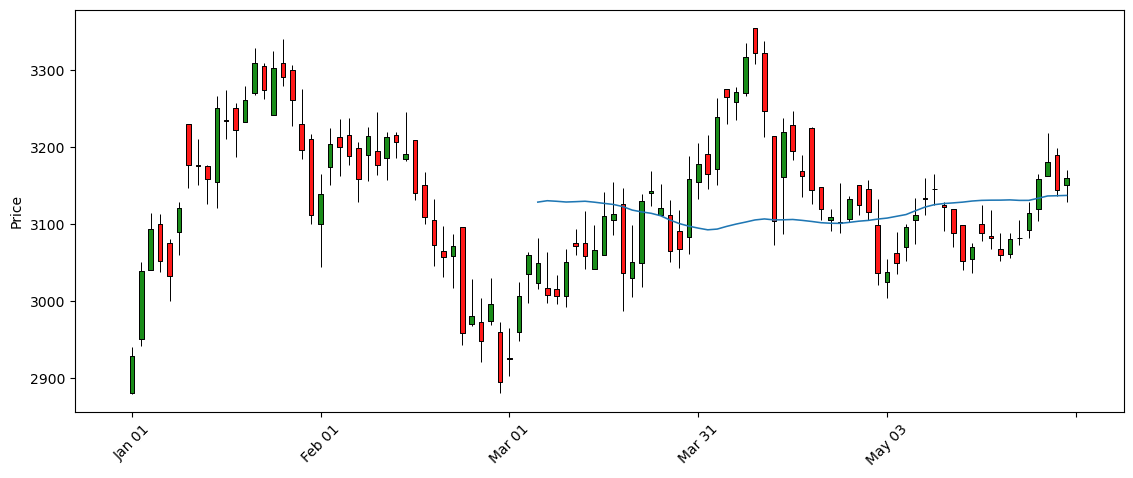

TATACONSUM


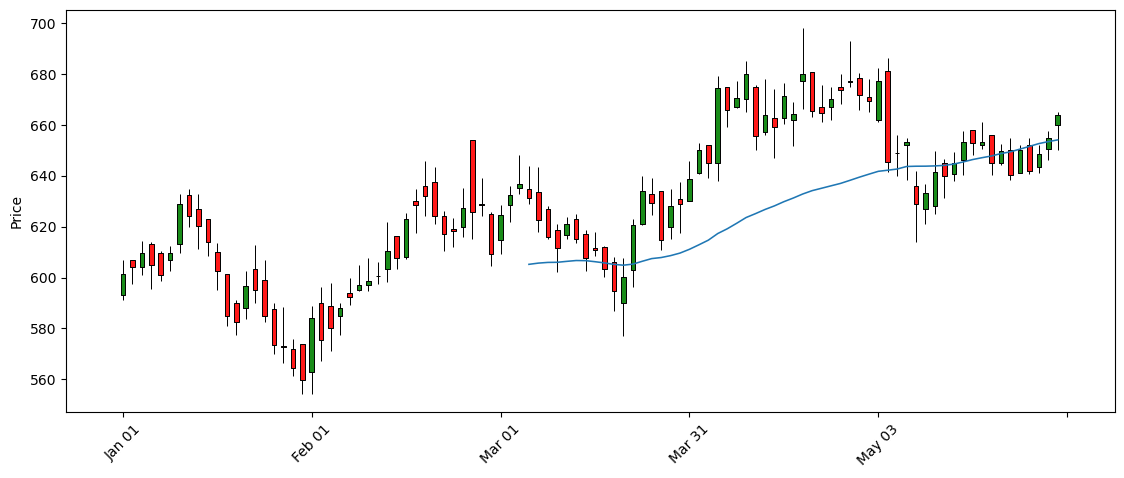

In [16]:
for index, row in rising_stocks.iterrows():
    stock = pd.read_csv('stocks/{symbol}.csv'.format(symbol=row["SYMBOL"]),index_col=0,parse_dates=True)
    #if (stock["High"][-1]>= stock["44_obs_for_SMA"][-1]) and (stock["Low"][-1]<= stock["44_obs_for_SMA"][-1]):
    print(row["SYMBOL"])

    mpf.plot(stock,type='candle',figratio=(38,15),mav=44,style=s)

In [18]:
import pathlib
import IPython.display as IPydisplay
#stock = pd.read_csv('stocks/TCS.csv',index_col=0,parse_dates=True)
for index, row in rising_stocks.iterrows():
    stock = pd.read_csv('stocks/{symbol}.csv'.format(symbol=row["SYMBOL"]),index_col=0,parse_dates=True)
    ourpath = pathlib.Path("img/{symbol}.png".format(symbol=row["SYMBOL"]))
    mpf.plot(stock, type='candle',figratio=(100,40), mav=44, savefig=ourpath,style=s)
    #IPydisplay.Image(ourpath)